# DOMAIN: Banking and finance

# CONTEXT: 
A bank X is on a massive digital transformation for all its departments. Bank has a growing customer base whee majority of them are liability customers (depositors) vs borrowers (asset customers). The bank is interested in expanding the borrowers base rapidly to bring in more business via loan interests. A campaign that the bank ran in last quarter showed an average single digit conversion rate. Digital transformation being the core strength of the business strategy, marketing department wants to devise effective campaigns with better target marketing to increase the conversion ratio to double digit with same budget as per last campaign. 

# DATA DESCRIPTION: 
The data consists of the following attributes: 
1. ID: Customer ID
2. Age Customer’s approximate age.
3. CustomerSince: Customer of the bank since. [unit is masked]
4. HighestSpend: Customer’s highest spend so far in one transaction. [unit is masked]
5. ZipCode: Customer’s zip code.
6. HiddenScore: A score associated to the customer which is masked by the bank as an IP.
7. MonthlyAverageSpend: Customer’s monthly average spend so far. [unit is masked]
8. Level: A level associated to the customer which is masked by the bank as an IP.
9. Mortgage: Customer’s mortgage. [unit is masked]
10. Security: Customer’s security asset with the bank. [unit is masked]
11. FixedDepositAccount: Customer’s fixed deposit account with the bank. [unit is masked]
12. InternetBanking: if the customer uses internet banking.
13. CreditCard: if the customer uses bank’s credit card.
14. LoanOnCard: if the customer has a loan on credit card.

# PROJECT OBJECTIVE: 
Build an AIML model to perform focused marketing by predicting the potential customers who will convert using the historical dataset.
 Steps and tasks:
## 1. Import and warehouse data:

• Import all the given datasets and explore shape and size of each.

• Merge all datasets onto one and explore final shape and size.

## 2. Data cleansing:

• Explore and if required correct the datatypes of each attribute

• Explore for null values in the attributes and if required drop or impute values.

## 3. Data analysis & visualisation:

• Perform detailed statistical analysis on the data.

• Perform a detailed univariate, bivariate and multivariate analysis with appropriate detailed comments after each analysis. 

## 4. Data pre-processing:

• Segregate predictors vs target attributes

• Check for target balancing and fix it if found imbalanced.

• Perform train-test split.

## 5. Model training, testing and tuning:

• Design and train a Logistic regression and Naive Bayes classifiers.

• Display the classification accuracies for train and test data.

• Display and explain the classification report in detail.

• Apply all the possible tuning techniques to train the best model for the given data. Select the final best trained model with your comments for selecting this model. 

## 6. Conclusion and improvisation:

• Write your conclusion on the results.

• Detailed suggestions or improvements or on quality, quantity, variety, velocity, veracity etc. on the data points collected by the bank to perform a better data analysis in future.

# Solution : 

Importing libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# 1. Import and warehouse data:

1. a.  Import all the given datasets and explore shape and size of each.

In [2]:
ds1=pd.read_csv("Part2 - Data1.csv")
ds2=pd.read_csv("Part2 -Data2.csv")

In [3]:
ds1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   5000 non-null   int64  
 1   Age                  5000 non-null   int64  
 2   CustomerSince        5000 non-null   int64  
 3   HighestSpend         5000 non-null   int64  
 4   ZipCode              5000 non-null   int64  
 5   HiddenScore          5000 non-null   int64  
 6   MonthlyAverageSpend  5000 non-null   float64
 7   Level                5000 non-null   int64  
dtypes: float64(1), int64(7)
memory usage: 312.6 KB


In [4]:
ds2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   5000 non-null   int64  
 1   Mortgage             5000 non-null   int64  
 2   Security             5000 non-null   int64  
 3   FixedDepositAccount  5000 non-null   int64  
 4   InternetBanking      5000 non-null   int64  
 5   CreditCard           5000 non-null   int64  
 6   LoanOnCard           4980 non-null   float64
dtypes: float64(1), int64(6)
memory usage: 273.6 KB


1. b. Merge all datasets onto one and explore final shape and size.

In [5]:
ds = pd.merge(ds1,ds2,on='ID')
ds

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,1,25,1,49,91107,4,1.6,1,0,1,0,0,0,NaN
1,2,45,19,34,90089,3,1.5,1,0,1,0,0,0,NaN
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,NaN
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,NaN
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,1,0,0.0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,1,0,0.0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0.0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,1,0,0.0


# 2. Data cleansing:

2. a. Explore and if required correct the datatypes of each attribute

In [6]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   5000 non-null   int64  
 1   Age                  5000 non-null   int64  
 2   CustomerSince        5000 non-null   int64  
 3   HighestSpend         5000 non-null   int64  
 4   ZipCode              5000 non-null   int64  
 5   HiddenScore          5000 non-null   int64  
 6   MonthlyAverageSpend  5000 non-null   float64
 7   Level                5000 non-null   int64  
 8   Mortgage             5000 non-null   int64  
 9   Security             5000 non-null   int64  
 10  FixedDepositAccount  5000 non-null   int64  
 11  InternetBanking      5000 non-null   int64  
 12  CreditCard           5000 non-null   int64  
 13  LoanOnCard           4980 non-null   float64
dtypes: float64(2), int64(12)
memory usage: 585.9 KB


In [7]:
ds.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
CustomerSince,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
HighestSpend,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZipCode,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
HiddenScore,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
MonthlyAverageSpend,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Level,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Security,5000.0,0.104400,0.305809,0.0,0.00,0.0,0.00,1.0


2. b. Explore for null values in the attributes and if required drop or impute values.

In [8]:
ds.isnull().sum()

ID                      0
Age                     0
CustomerSince           0
HighestSpend            0
ZipCode                 0
HiddenScore             0
MonthlyAverageSpend     0
Level                   0
Mortgage                0
Security                0
FixedDepositAccount     0
InternetBanking         0
CreditCard              0
LoanOnCard             20
dtype: int64

In [9]:
ds.LoanOnCard= ds.LoanOnCard.apply(lambda x : 1 if x == 1 else 0 )

Here we have removed all the null values from the dataset.
Only the column LoanOnCard has 20 null values.
Here we can assume that if the LoanOnCard column is vacant, then it means there is no loan on the card. i.e. LoanOnCard = 0 

# 3. Data analysis & visualisation:

3. a. Perform detailed statistical analysis on the data

In [10]:
ds.describe(include='all').transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
CustomerSince,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
HighestSpend,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZipCode,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
HiddenScore,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
MonthlyAverageSpend,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Level,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Security,5000.0,0.104400,0.305809,0.0,0.00,0.0,0.00,1.0


<AxesSubplot:xlabel='Age', ylabel='Count'>

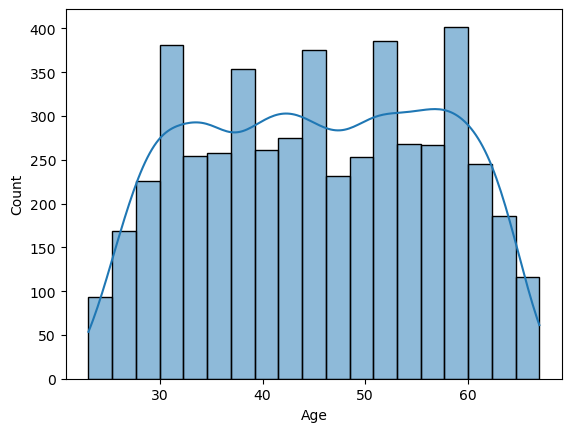

In [11]:
sns.histplot(ds.Age, kde=True )

<AxesSubplot:xlabel='CustomerSince', ylabel='Count'>

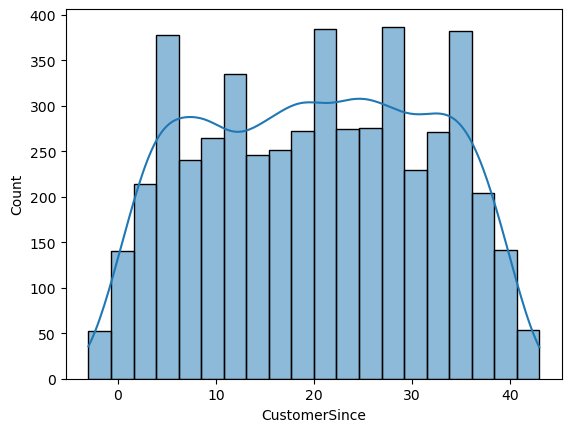

In [12]:
sns.histplot(ds.CustomerSince, kde= True)

<AxesSubplot:xlabel='HighestSpend', ylabel='Count'>

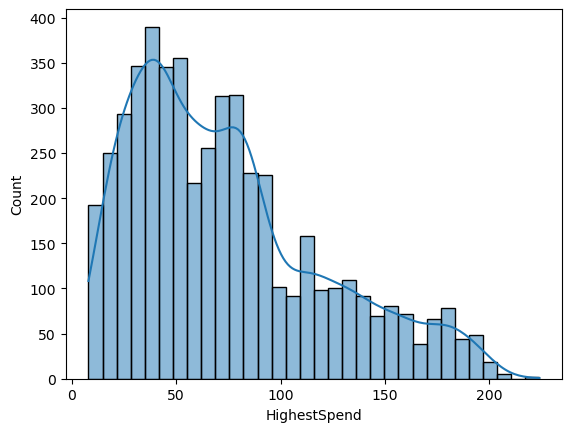

In [13]:
sns.histplot(ds.HighestSpend, kde= True)

<AxesSubplot:>

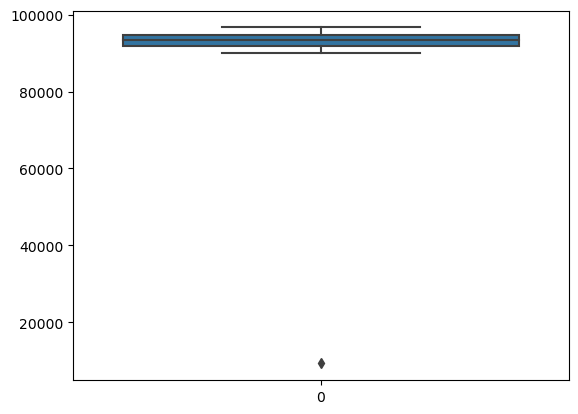

In [14]:
sns.boxplot(ds.ZipCode)

Here,  we understand that there is an outlier present in the data.
This is a clerical mistake.

AxesSubplot(0.125,0.11;0.775x0.77)


C:\Users\ac253\AppData\Local\Temp\ipykernel_37700\3301166462.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds.ZipCode[ds.ZipCode < 80000]=10*ds.ZipCode[ds.ZipCode < 80000]


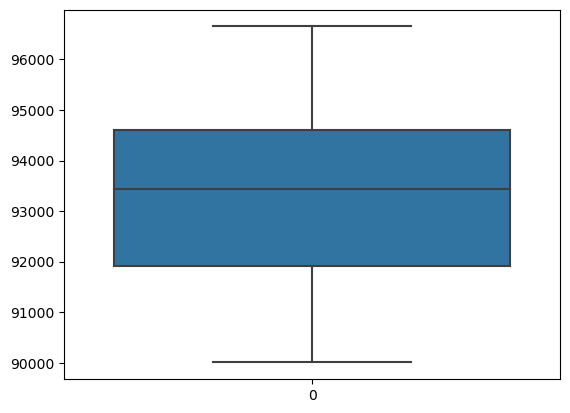

In [15]:
# After dealing with the outlier
ds.ZipCode[ds.ZipCode < 80000]=10*ds.ZipCode[ds.ZipCode < 80000]
print(sns.boxplot(ds.ZipCode))

<AxesSubplot:xlabel='ZipCode', ylabel='Count'>

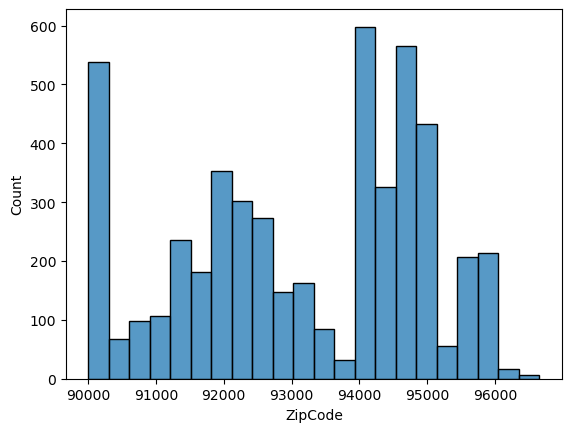

In [16]:
sns.histplot(ds.ZipCode)

<AxesSubplot:ylabel='count'>

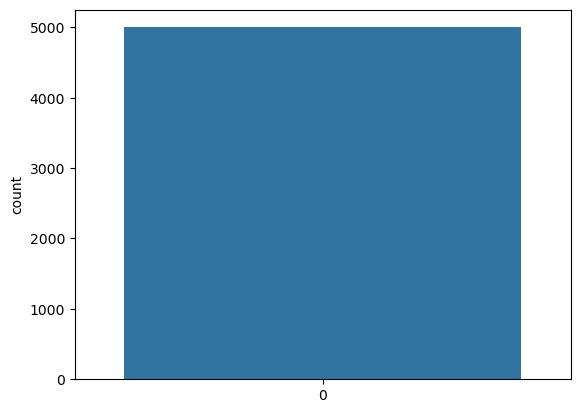

In [17]:
sns.countplot(ds.HiddenScore)

<AxesSubplot:xlabel='MonthlyAverageSpend', ylabel='Count'>

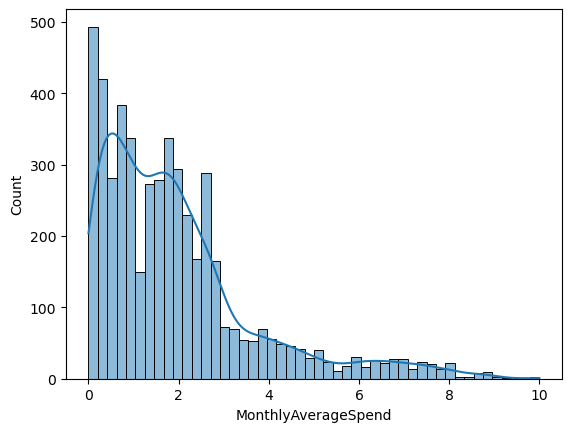

In [18]:
sns.histplot(ds.MonthlyAverageSpend, kde= True)

<AxesSubplot:ylabel='count'>

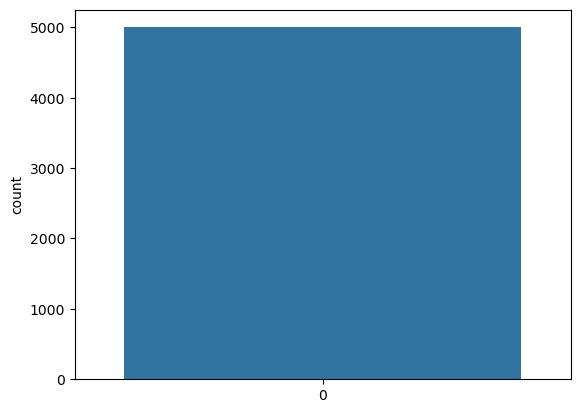

In [19]:
sns.countplot(ds.Level)

<AxesSubplot:xlabel='Mortgage', ylabel='Count'>

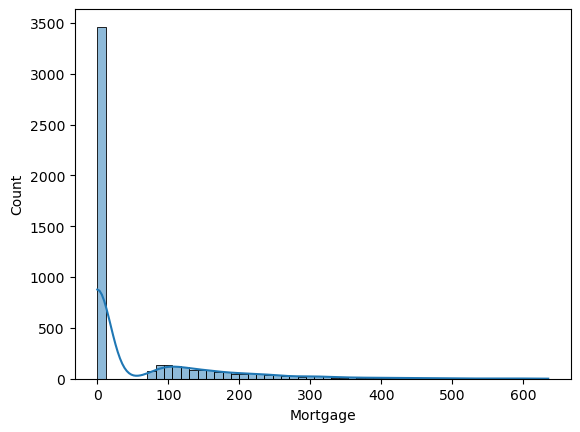

In [20]:
sns.histplot(ds.Mortgage,kde=True,stat='count')

<AxesSubplot:xlabel='Mortgage', ylabel='Count'>

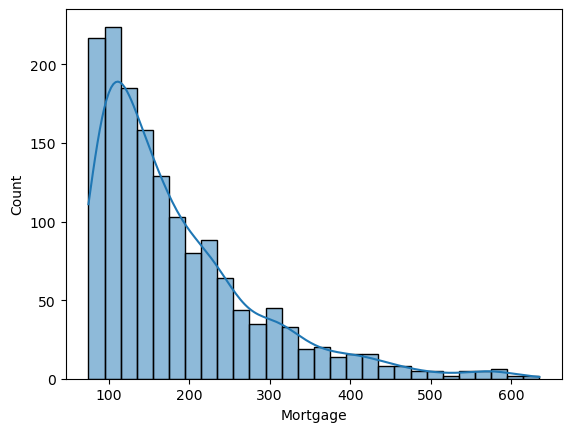

In [21]:
mort=ds.Mortgage[ds.Mortgage > 0]
# Here we are looking for the count of people who have mortgage. 
# Hence we have excluded people with zero mortgage from the chart.
sns.histplot(mort, kde= True)

<AxesSubplot:xlabel='Security', ylabel='count'>

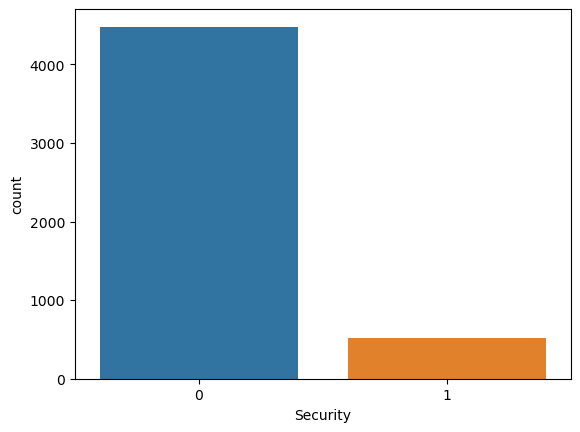

In [22]:
sns.countplot(x=ds.Security)

<AxesSubplot:ylabel='count'>

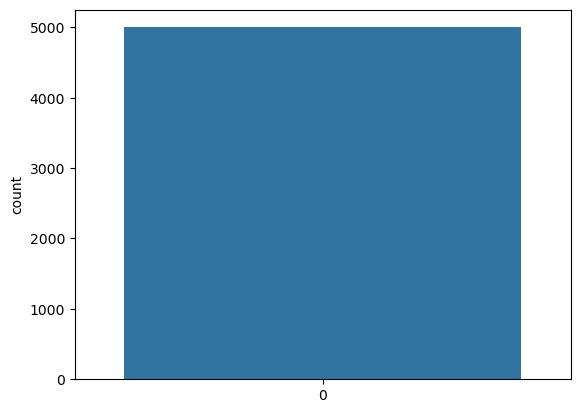

In [23]:
sns.countplot(ds.FixedDepositAccount)

<AxesSubplot:ylabel='count'>

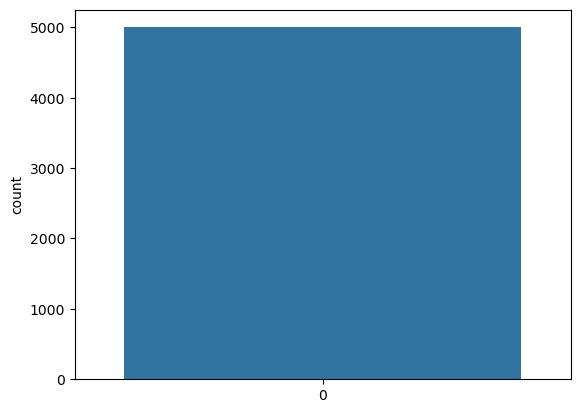

In [24]:
sns.countplot(ds.InternetBanking)

<AxesSubplot:ylabel='count'>

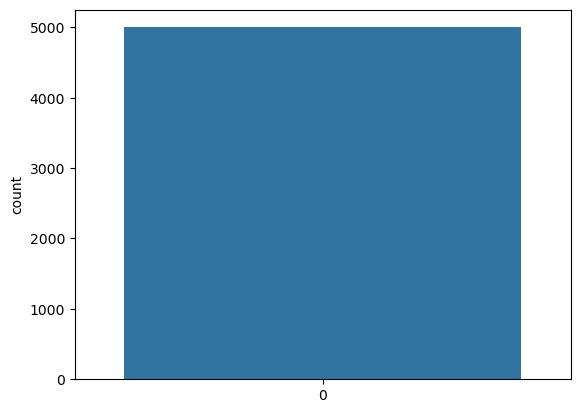

In [25]:
sns.countplot(ds.CreditCard)

<AxesSubplot:ylabel='count'>

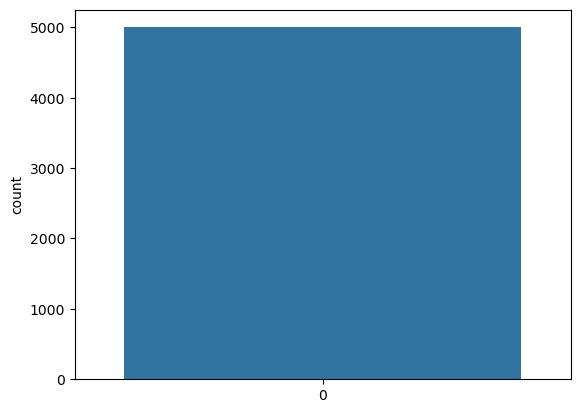

In [26]:
sns.countplot(ds.LoanOnCard)

Since zipcode and ID column have no effect on the customer's ability to get a loan, we will drop the columns.

In [27]:
ds=ds.drop(['ID','ZipCode'], axis=1)
ds

,Age,CustomerSince,HighestSpend,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,25,1,49,4,1.6,1,0,1,0,0,0,0
1,45,19,34,3,1.5,1,0,1,0,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,1,1.9,3,0,0,0,1,0,0
4996,30,4,15,4,0.4,1,85,0,0,1,0,0
4997,63,39,24,2,0.3,3,0,0,0,0,0,0
4998,65,40,49,3,0.5,2,0,0,0,1,0,0


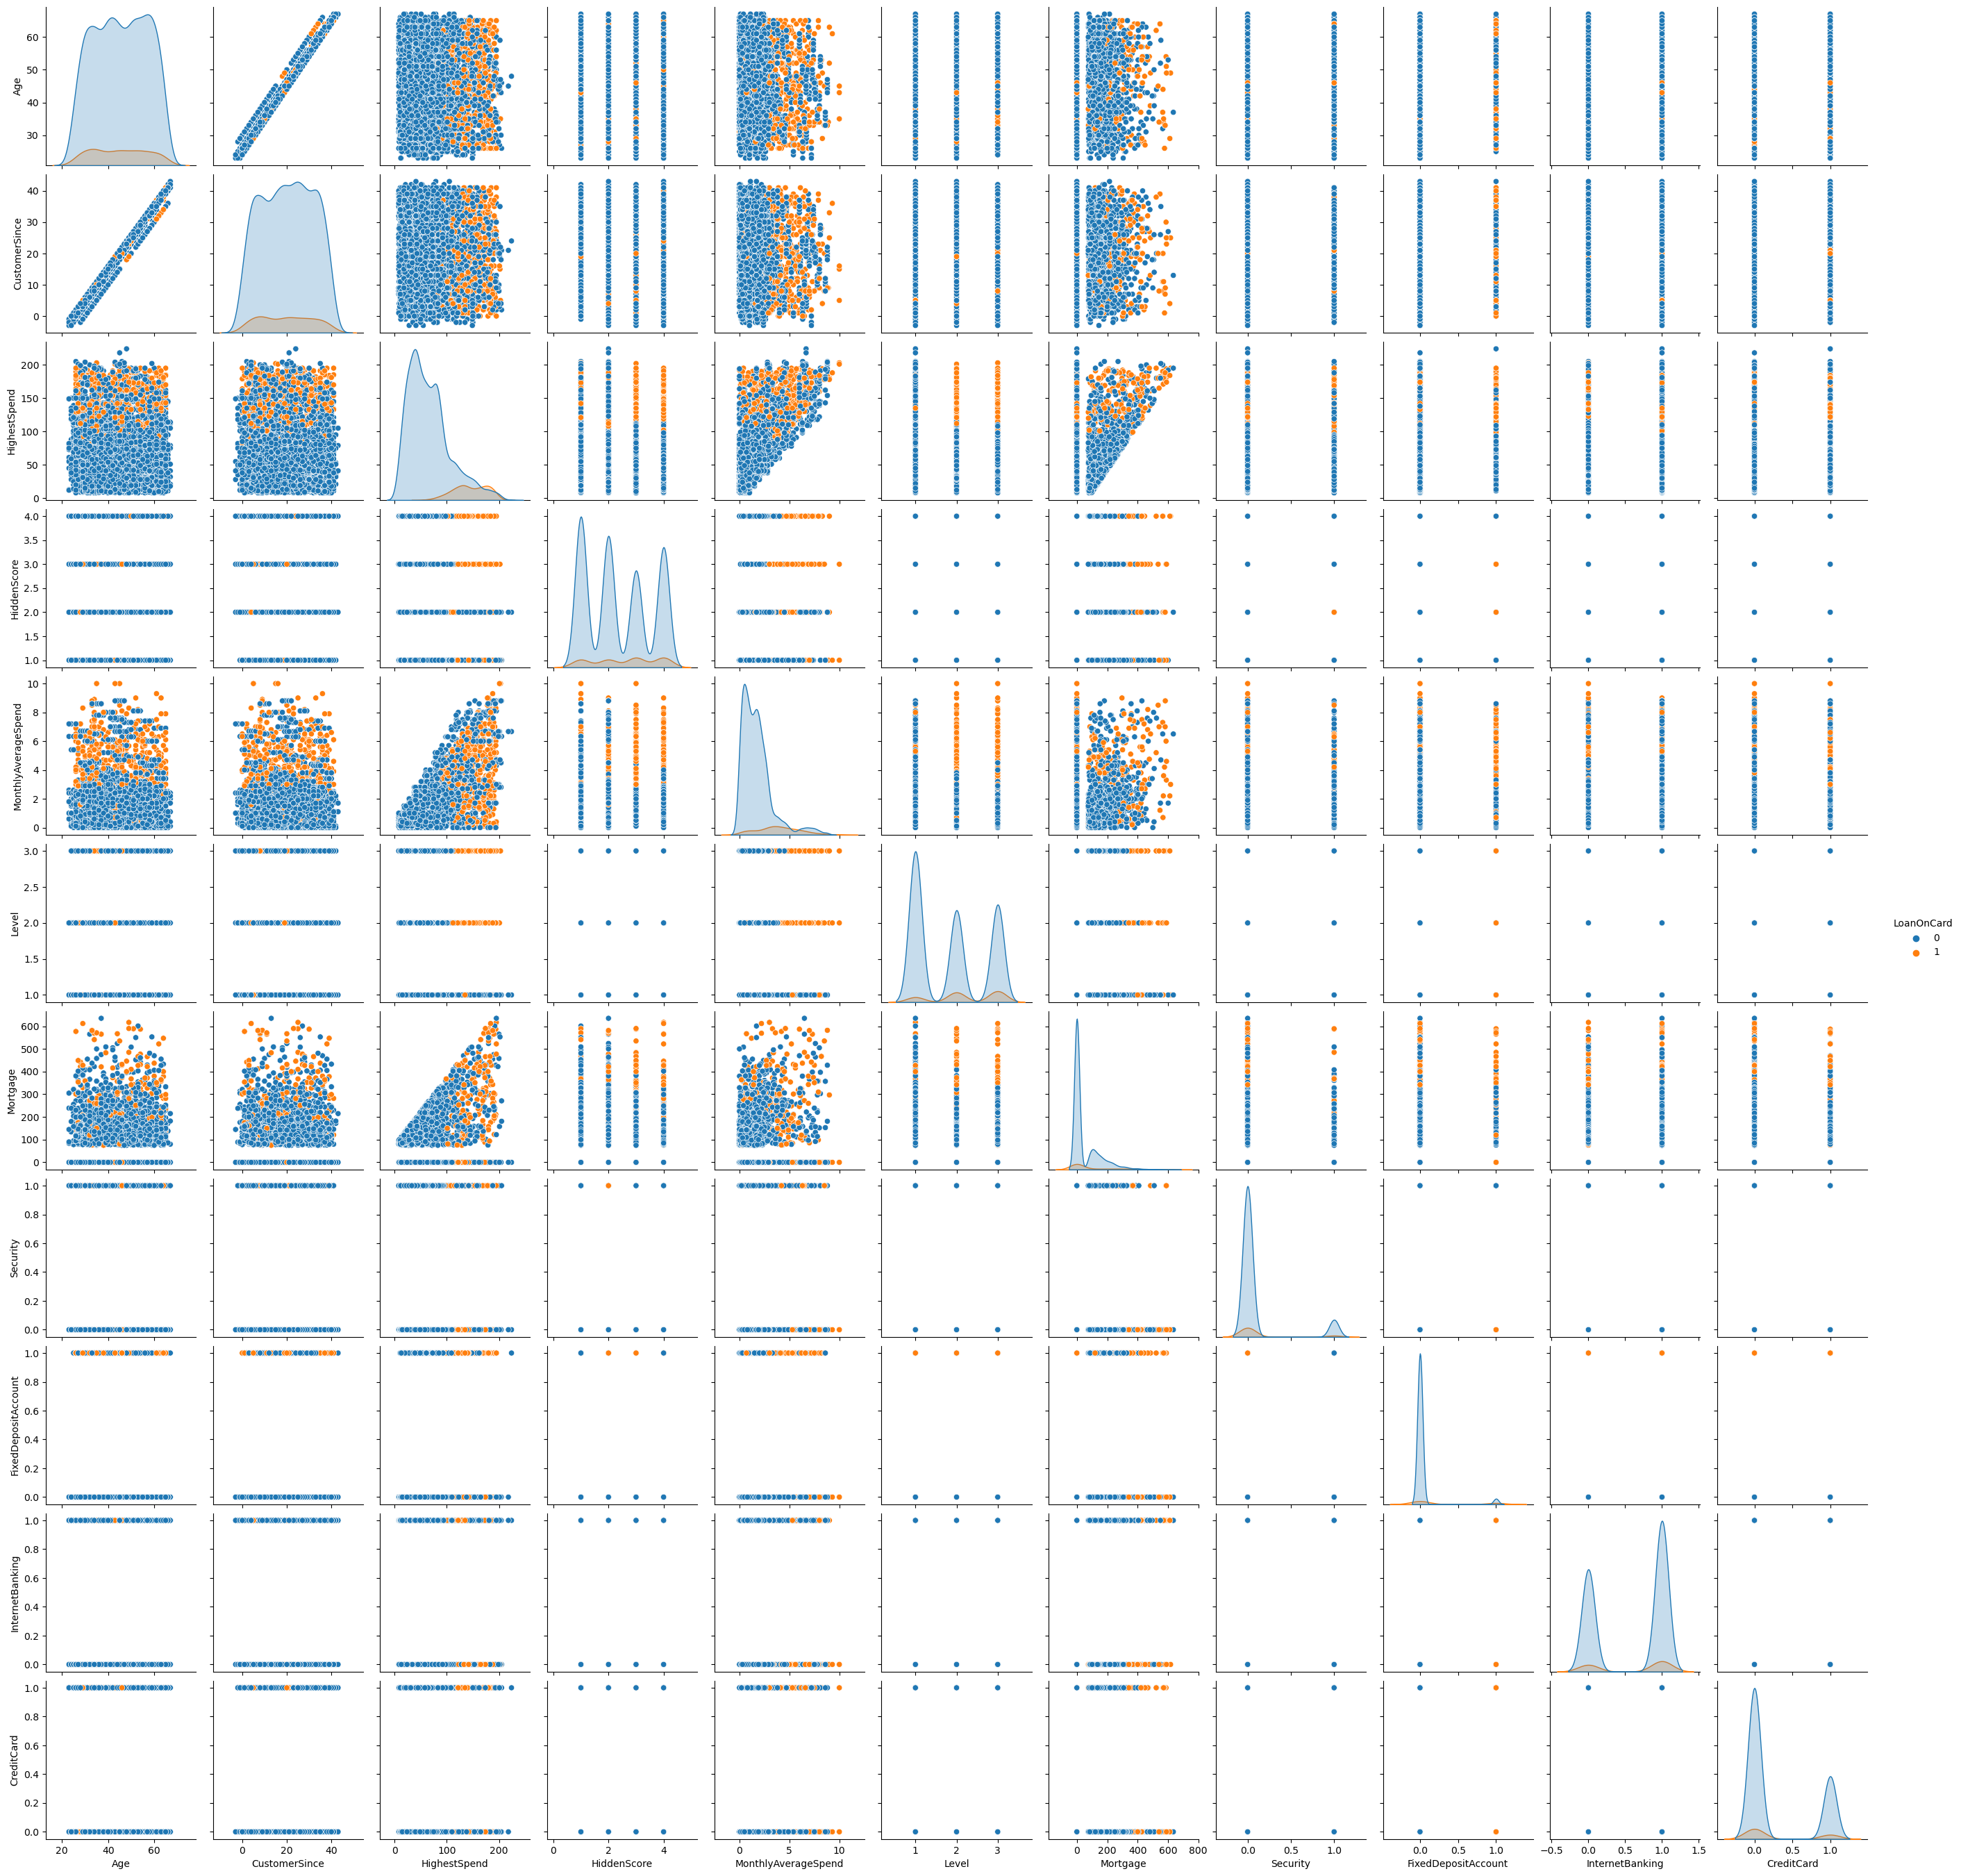

In [28]:
sns.pairplot(ds, hue = 'LoanOnCard')

0.994214856968332


<AxesSubplot:xlabel='Age', ylabel='CustomerSince'>

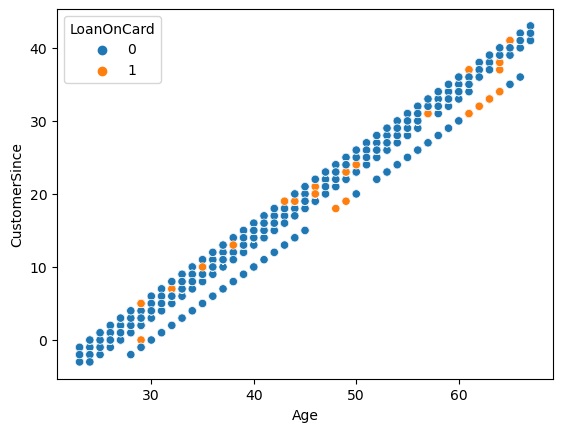

In [29]:
print(ds.Age.corr(ds.CustomerSince))
sns.scatterplot(x=ds.Age,y=ds.CustomerSince, hue = ds.LoanOnCard)


In Naive bayes, we assume that the atttributes are independent.
Here, the corelation between Age and CustomerSince column is almost 1.
Thus, they are not indepent of each other. Here we drop one of the columns.

In [30]:
ds=ds.drop(ds[['CustomerSince']], axis=1)
ds

,Age,HighestSpend,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,25,49,4,1.6,1,0,1,0,0,0,0
1,45,34,3,1.5,1,0,1,0,0,0,0
2,39,11,1,1.0,1,0,0,0,0,0,0
3,35,100,1,2.7,2,0,0,0,0,0,0
4,35,45,4,1.0,2,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
4995,29,40,1,1.9,3,0,0,0,1,0,0
4996,30,15,4,0.4,1,85,0,0,1,0,0
4997,63,24,2,0.3,3,0,0,0,0,0,0
4998,65,49,3,0.5,2,0,0,0,1,0,0


In [31]:
corela=ds.corr()
corela

,Age,HighestSpend,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
Age,1.000000,-0.055269,-0.046418,-0.052012,0.041334,-0.012539,-0.000436,0.008043,0.013702,0.007681,-0.007726
HighestSpend,-0.055269,1.000000,-0.157501,0.645984,-0.187524,0.206806,-0.002616,0.169738,0.014206,-0.002385,0.502462
HiddenScore,-0.046418,-0.157501,1.000000,-0.109275,0.064929,-0.020445,0.019994,0.014110,0.010354,0.011588,0.061367
MonthlyAverageSpend,-0.052012,0.645984,-0.109275,1.000000,-0.136124,0.109905,0.015086,0.136534,-0.003611,-0.006689,0.366889
Level,0.041334,-0.187524,0.064929,-0.136124,1.000000,-0.033327,-0.010812,0.013934,-0.015004,-0.011014,0.136722
Mortgage,-0.012539,0.206806,-0.020445,0.109905,-0.033327,1.000000,-0.005411,0.089311,-0.005995,-0.007231,0.142095
Security,-0.000436,-0.002616,0.019994,0.015086,-0.010812,-0.005411,1.000000,0.317034,0.012627,-0.015028,0.021954
FixedDepositAccount,0.008043,0.169738,0.014110,0.136534,0.013934,0.089311,0.317034,1.000000,0.175880,0.278644,0.316355
InternetBanking,0.013702,0.014206,0.010354,-0.003611,-0.015004,-0.005995,0.012627,0.175880,1.000000,0.004210,0.006278
CreditCard,0.007681,-0.002385,0.011588,-0.006689,-0.011014,-0.007231,-0.015028,0.278644,0.004210,1.000000,0.002802


<AxesSubplot:>

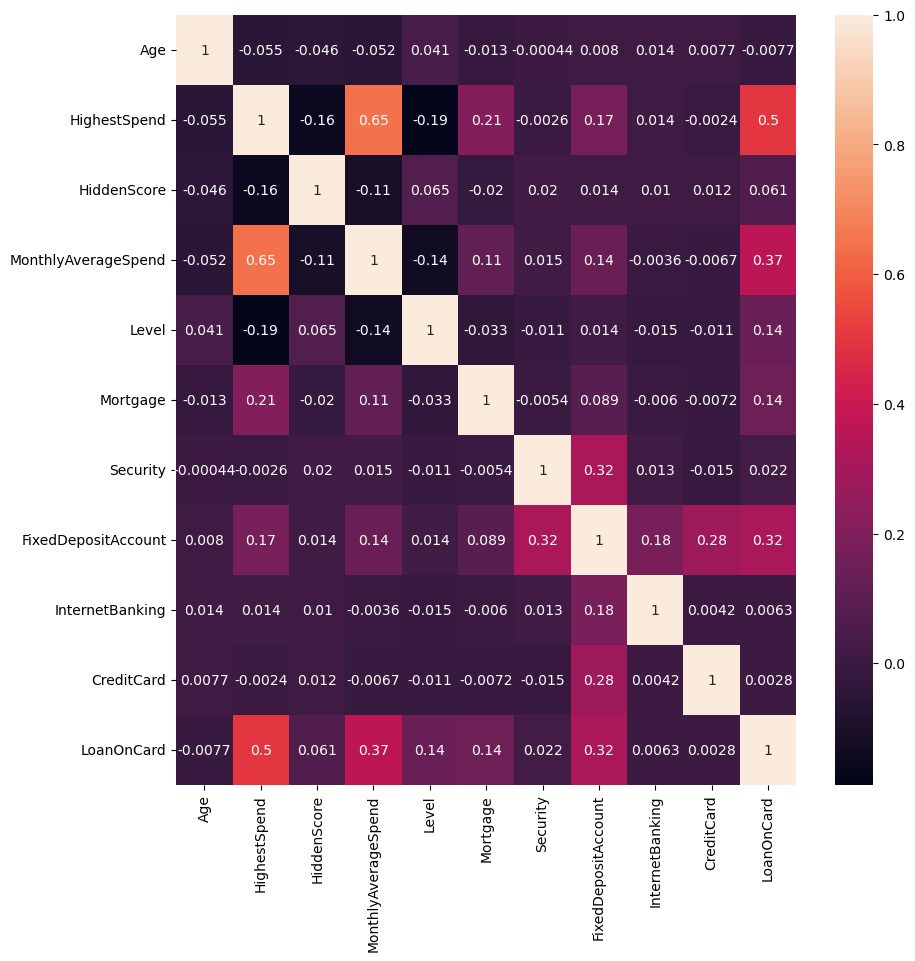

In [32]:
plt.subplots(figsize=(10,10))
sns.heatmap(corela, annot=True)

# 4. Data pre-processing:

4. a. Segregate predictors vs target attributes

In [33]:
X=ds.drop('LoanOnCard',axis =1)
Y = ds.LoanOnCard

In [34]:
from sklearn.preprocessing import MinMaxScaler
norm = MinMaxScaler().fit(X)
X_norm = norm.transform(X)

Here, we are performing normalisation.

4. b. Check for target balancing and fix it if found imbalanced.

In [35]:
print(Y.value_counts())
sns.countplot(Y, hue = Y)

0    4520
1     480
Name: LoanOnCard, dtype: int64


ValueError: Cannot use `hue` without `x` and `y`

Here in the ds dataframe we have 4520 samples with no loan on card, 480 samples with loan on card.

Since this is a very huge difference in the sample size of the target attribute, we need to perform target balancing.

*Synthetic Minority Oversampling Technique* is used since it prevents overrfitting and no useful information is lost.

In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
X_res, Y_res = sm.fit_sample(X_norm, Y)

In [ ]:
print(X_res.shape)
print(Y_res.shape)
print(Y_res.value_counts())
sns.countplot(x= Y_res, hue = Y_res)

The number of samples from our dataset have incresed from 5000 to 9040 after target balancing.

4. c.  Perform train-test split.

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X_res, Y_res , test_size=0.2, random_state=1)
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

5. Model training, testing and tuning:

5. a. Design and train a Logistic regression and Naive Bayes classifiers

In [ ]:
#Build the logistic regression model
logreg = LogisticRegression(max_iter=1000)

logreg.fit(X_train, Y_train.values.ravel())

In [ ]:
#Build the Gaussian Naive Bayes model
nb_model = GaussianNB()

nb_model.fit(X_train, Y_train.ravel())

5. b. Display the classification accuracies for train and test data.

In [ ]:
#Predict for train set using logistic regression
pred_train = logreg.predict(X_train)

from sklearn.metrics import accuracy_score
train_accuracy=accuracy_score(Y_train, pred_train)

print('Train Accuracy: ',np.round(train_accuracy,2))

In [ ]:
#Predict for test set using logistic Regression
pred_test = logreg.predict(X_test)

test_accuracy=accuracy_score(Y_test, pred_test)

print('Test Accuracy: ',np.round(test_accuracy,2))

In [ ]:
#Predict for train set using Naive Bayes
train_predict = nb_model.predict(X_train)

from sklearn import metrics

print("Model Accuracy for train set: {0:.4f}".format(metrics.accuracy_score(Y_train,train_predict)))

In [ ]:
#Predict for test set using Naive Bayes
test_predict = nb_model.predict(X_test)


print("Model Accuracy for test set: {0:.4f}".format(metrics.accuracy_score(Y_test,test_predict)))

5. c. Display and explain the classification report in detail.

In [ ]:
# for logistic Regression

from sklearn.metrics import classification_report

print(pd.Series(pred_test).value_counts())
sns.countplot(x= pred_test, hue = pred_test)

print(classification_report(Y_test,pred_test))

The logistic regression classifier made a total of 1808 predictions.

Out of the 1808 predictions, 889 are classified as '0' (i.e. No loan on card) and 919 are classified as '1'(i.e. There is loan on card).

In reality, of the 1808 samples, 879 are in class '0' (i.e. No loan on card) and 929 are in class '1'(i.e. There is loan on card).

In [ ]:
# for naive bayes

print(pd.Series(test_predict).value_counts())
sns.countplot(x= test_predict, hue = test_predict)

print(classification_report(Y_test,test_predict))

The naive bayes classifier made a total of 1808 predictions.

Out of the 1808 predictions, 991 are classified as '0' (i.e. No loan on card) and 817 are classified as '1'(i.e. There is loan on card).

In reality, of the 1808 samples, 879 are in class '0' (i.e. No loan on card) and 929 are in class '1'(i.e. There is loan on card).

5. d. Apply all the possible tuning techniques to train the best model for the given data. Select the final best trained model with your comments for selecting this model. 

In [ ]:
# for Logistic regression

from sklearn.model_selection import cross_val_score

scores = cross_val_score(logreg, X, Y, cv=10, scoring='accuracy')
print(scores)

In [ ]:
# for naive bayes

scores = cross_val_score(nb_model, X, Y, cv=10, scoring='accuracy')
print(scores)

We have already normalization and resampled the data.

# 6. Conclusion and improvisation:

We have implemented logistic regression and naive bayes classifier to predict if the bank's customer will take a loan or not. With logistic regression we have obtained the accuracy of 90% and for naive bayes classfier we have obtained the accuracy of 83.74%.

Due to solve the problem of imbalanced data of target attributes,  resampling is done to balance the target attribute. We have used SMOTE to resample the data.

Furthermore, in the data exploration section with descriptive statistics of the data set and visualization tasks revealed a better idea of the data set before the prediction.

Moreover, the classification report in the evaluation section clearly represented the accuracy scores and visualizations in detail for the predicted model.

In future the data should include:

• salary

• number of dependents

• any foreseeable expense like college tutions, child birth

• any other data that can have any impact on their decisions to get a loan ie inheritance, investments.